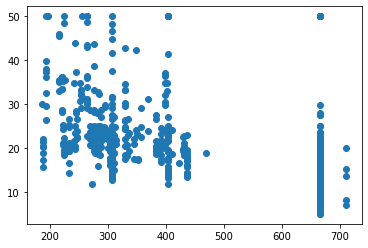

Metryka domyślna:  0.24311281898728176
Współczynniki regresji:
 [-0.02498665]


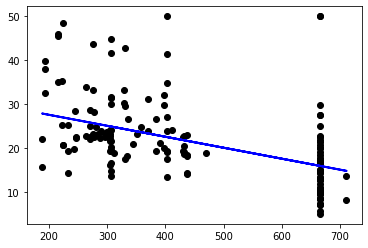

Walidacja krzyżowa
[ -50.8456349   -83.67532938 -110.80462379  -91.63760449  -27.09855527]


In [1]:
# Zadanie 1
# Wybierz inną cechę i spróbuj przewidzieć ceny mieszkań. Użyj walidacji krzyżowej.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

import seaborn as sns
 
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytanie zbioru cech nieruchomości i ich cen
boston_nieruchomosci = load_boston()

age = boston_nieruchomosci['data'][:, np.newaxis, 9]
plt.scatter(age, boston_nieruchomosci['target'])
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Stworzenie regresora liniowego
linreg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(age, boston_nieruchomosci['target'], test_size = 0.3)

linreg.fit(X_train, y_train)

# przewidywanie ceny
y_pred = linreg.predict(X_test)

# domyślna metryka
print('Metryka domyślna: ', linreg.score(X_test, y_test))

# współczynniki regresji
print('Współczynniki regresji:\n', linreg.coef_)

# Wykres regresji - przewidywanie wieku właścicieli
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

from sklearn.model_selection import cross_val_score
print("Walidacja krzyżowa")
cv_score_mse = cross_val_score(linreg, age, boston_nieruchomosci.target, cv=5, scoring='neg_mean_squared_error')
print(cv_score_mse)